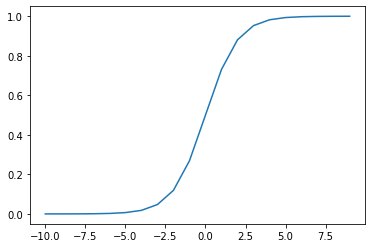

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import math

#-----------------------------#

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#-----------------------------#

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


e = math.e

sig_x = np.arange(-10,10)

y =  1 / (1 + (e ** -sig_x))

plt.plot(sig_x,y)

In [139]:
df_pay = pd.read_csv('payment_fraud.csv')

# .info() 데이터 정보 확인
print(df_pay.info())

df_pay.sample(10)

# 데이터 전처리 단계 - 열에 있는 데이터 숫자값으로 변경 있는 데이터 숫자값으로 변경
df_pay['paymentMethod'].unique()

df_pay["paymentMethod"] = df_pay['paymentMethod'].map({
    'paypal' : 0, 'storecredit' : 1, 'creditcard' : 2
})

df_pay.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB
None


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
3526,354,1,5.017904,0,0.011111,0
5922,1497,1,4.921318,2,0.002083,0
9443,1917,1,4.505662,2,1329.150000,0


In [153]:
features = df_pay[['accountAgeDays', 'numItems', 'localTime','paymentMethod','paymentMethodAgeDays']]
label = df_pay['label']


# train, test 데이터 분류 
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size = 0.2)


clf = LogisticRegression()
clf.fit(train_features, train_labels)

y_predict = clf.predict(test_features)
print(confusion_matrix(test_labels, y_predict))

[[7719    0]
 [   0  126]]


# 성능평가 Confusion Matrix
## 학습을 통해 예측 성능 측정을 위한 예측 값과 실제 값을 비교하기 위한 표   

* TP, TN(긍정예측) - 실제 값을 맞게 예측    
    * Ex. TP - 환자를 예측했는데 진짜로 환자를 맞춘경우  
    * Ex. TN - 실제로 환자가 아닌데 예측결과 환자가 아닌것으로 예측한경우
    
    
* FP, FN(부정예측) - 실제 값과 다르게 예측
    * Ex. FP - 환자라고 예측을 했는데 환자가 아닌경우
    * Ex. FN - 환자가 아니라고 예측 했는데 환자인 경우 (매우 위험)
![image.png](./img/confusion_matrix.png)   

## Mertics(평가지표)
* Accuracy(정확도) = TP + TN / Tp + TN + FP + FN   

* Precision(정밀도) = TP / TP + FP
    * 모델이 환자라고 예측한 것중 실제 환자를 얼마나 정확히 예측 했나   

* Recall(재현율) = TP / TP + FN
    * 실제 환자 중에 모델이 얼마나 환자라고 분류했나   


## F1 스코어(중요하다고 생각)

* F1 Score = 2 * Precision * Recall / Precision + Recall
    
![f1_score](./img/F1_SCORE.png)
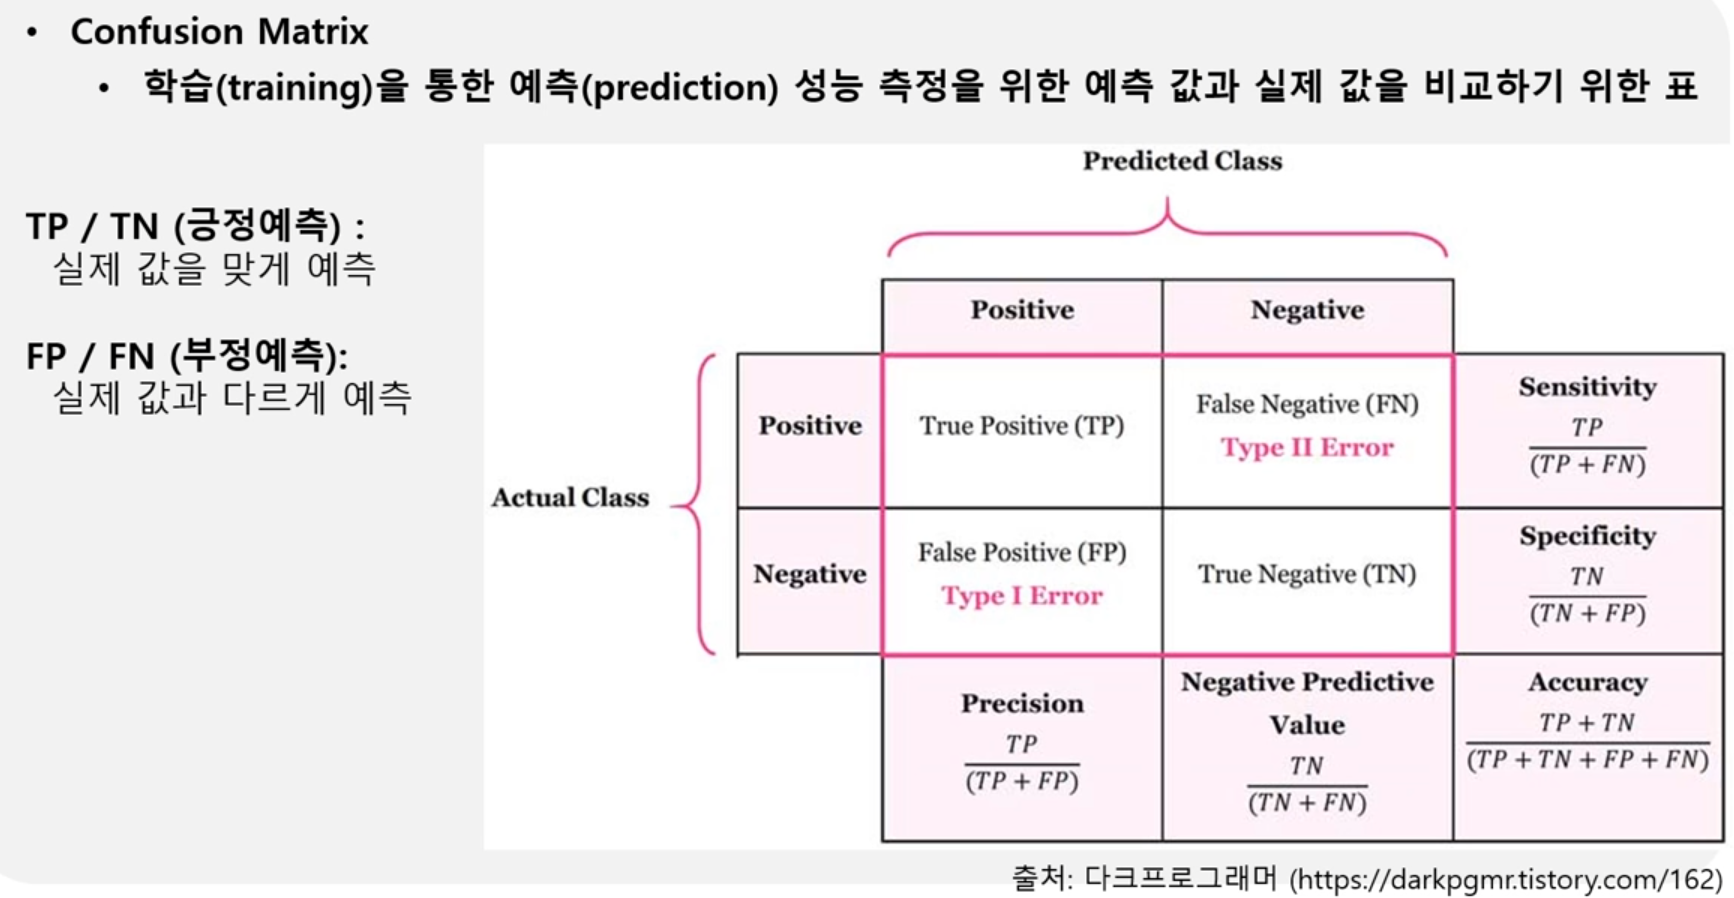